<a href="https://colab.research.google.com/github/Neelima-sathi/diabetes_prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


#Libraries required for modelling purposes
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Loading the 'Diabetes.csv' DataSet

In [2]:
url='https://raw.githubusercontent.com/Neelima-sathi/diabetes_prediction/refs/heads/main/Diabetes%20Prediction.csv'

In [3]:
db = pd.read_csv(url)

Checking the DataSet & Getting Information

In [4]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print("Shape of the DataSet:-")
db.shape
print("Number of rows =",db.shape[0])
print("Number of columns =",db.shape[1])

Shape of the DataSet:-
Number of rows = 768
Number of columns = 9


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking if any data is missing
db.isnull()
#No missing data, so no Data Cleaning & Pre-processing required

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Data Visualization

Making Heatmap using Correlation

In [9]:
# Creating Correlation from the DataSet
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Heatmap'}>

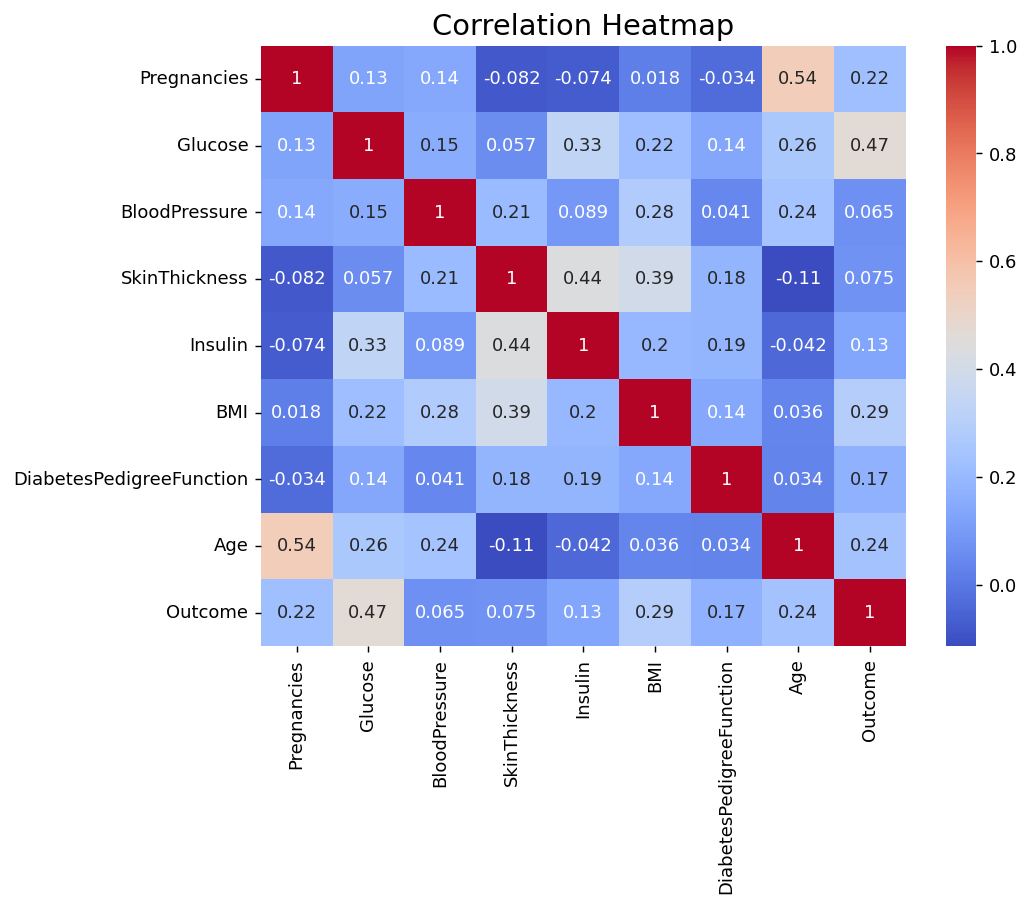

In [10]:
# Making the HeatMap
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Heatmap" , fontsize = 16 )
sns.heatmap (db.corr(), annot = True , cmap="coolwarm" )

Histplots of Data

In [11]:
cols = db.columns
colors = ['Blue',"Green","Red","Black"]

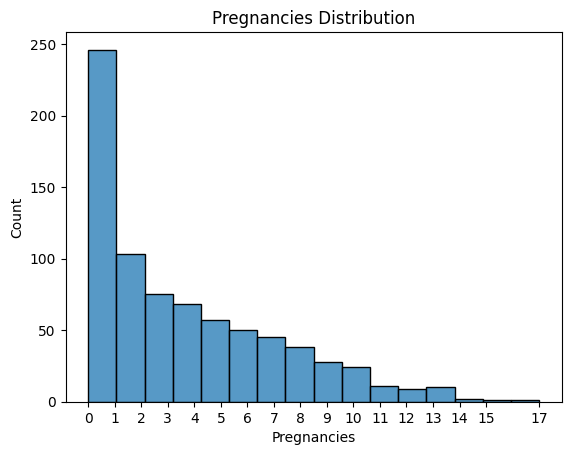

In [12]:
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=db, x=db[cols[0]])
plt.xticks(ticks=[i for i in db[cols[0]].unique()])
plt.show()

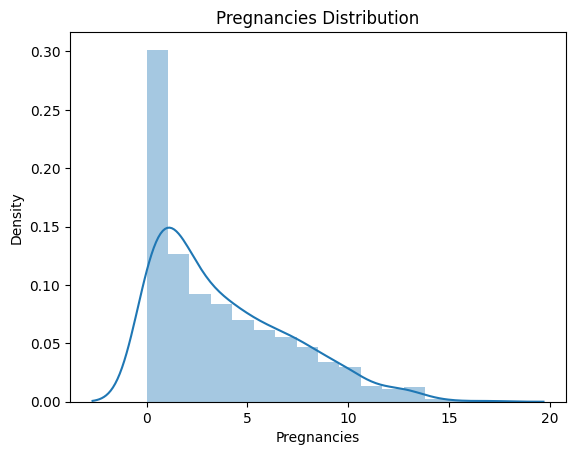

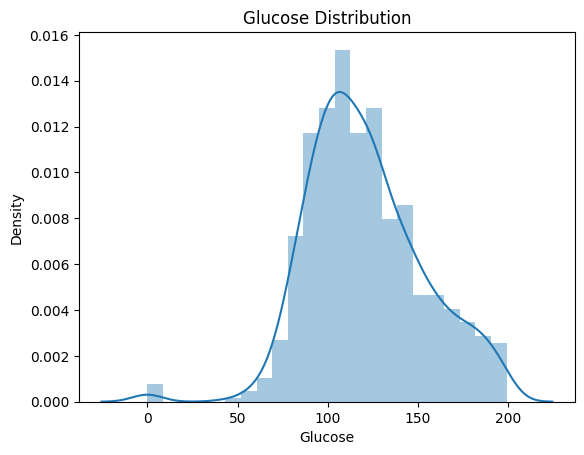

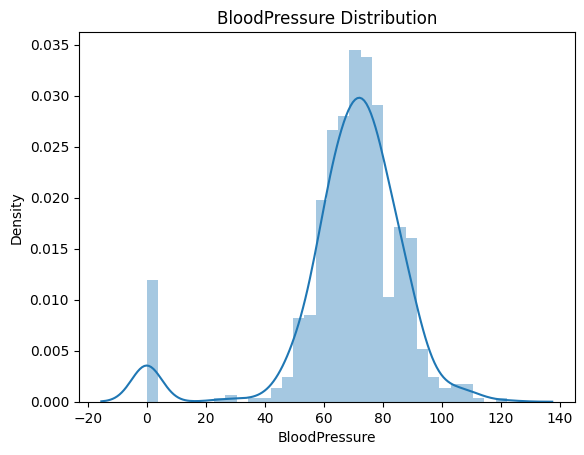

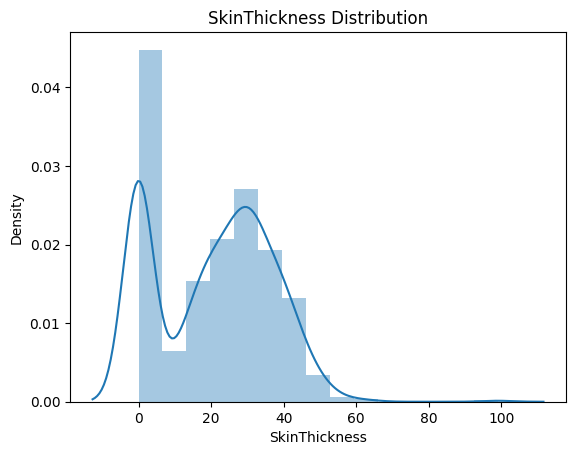

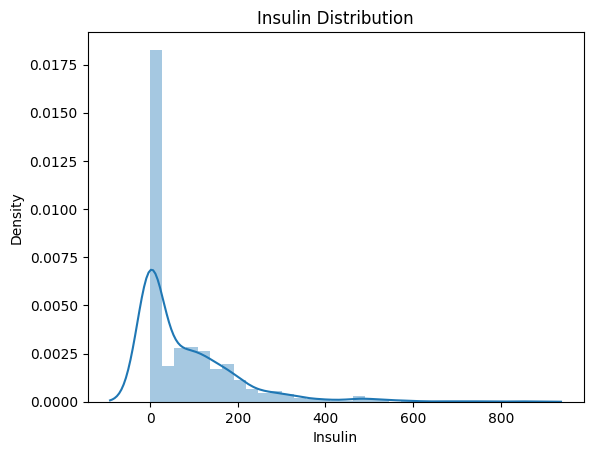

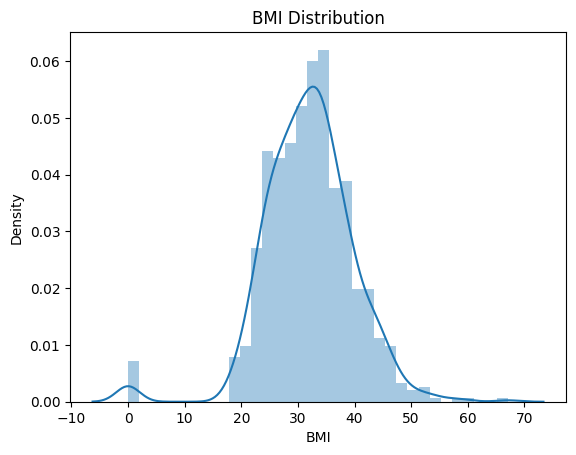

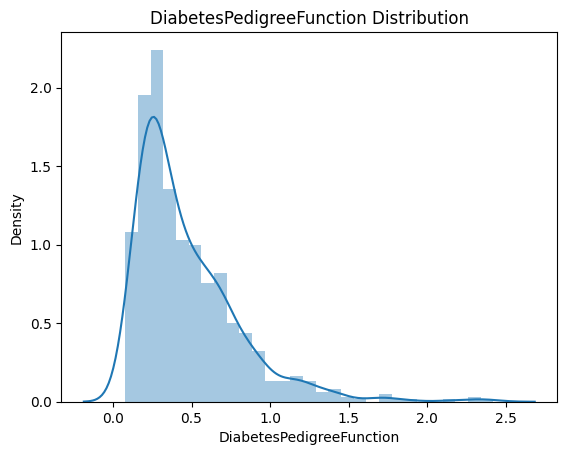

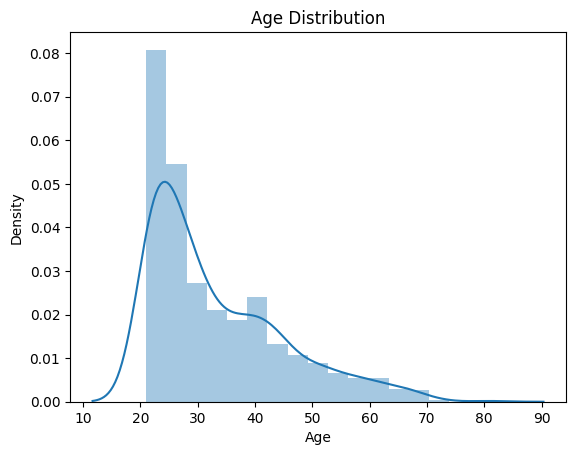

In [13]:
for i in range (0,8):
 plt.title(f"{cols[i]} Distribution")
 sns.distplot(db[cols[i]])
 plt.show()
 print('\n')

Observations

0 = Non-Diabetic
1 = Diabetic


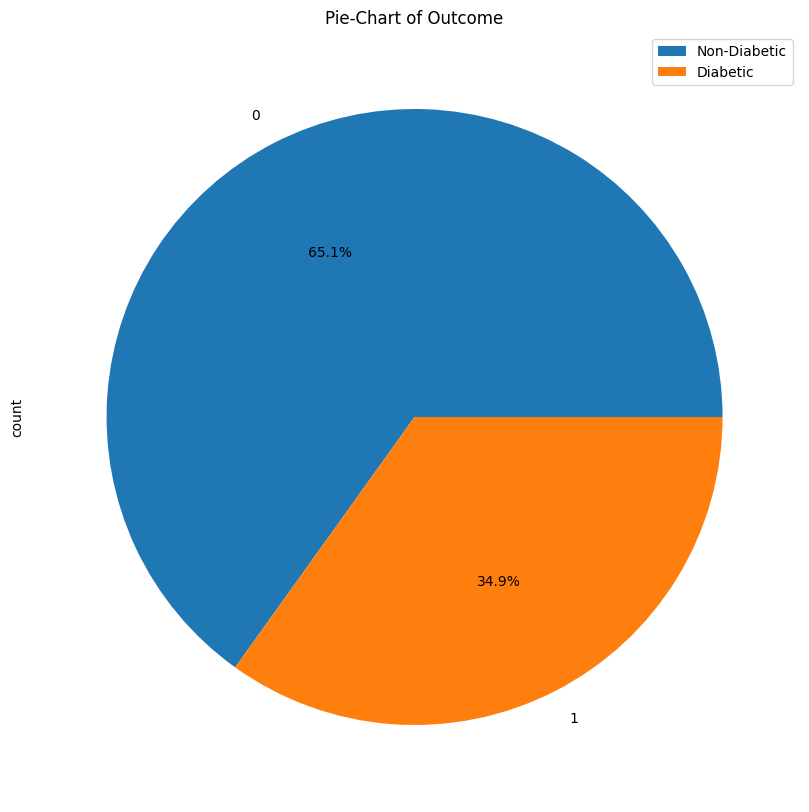

In [14]:
#Pie-Chart of Outcome
db.Outcome.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Pie-Chart of Outcome')
plt.legend(['Non-Diabetic', 'Diabetic'])
print("0 = Non-Diabetic")
print("1 = Diabetic")

Diabetic Patient Count:			268
Non-Diabetic Patient Count:		500
Diabetic Patient Percentage:		34.9 %
Non-Diabetic Patient Percentage:	65.1 %


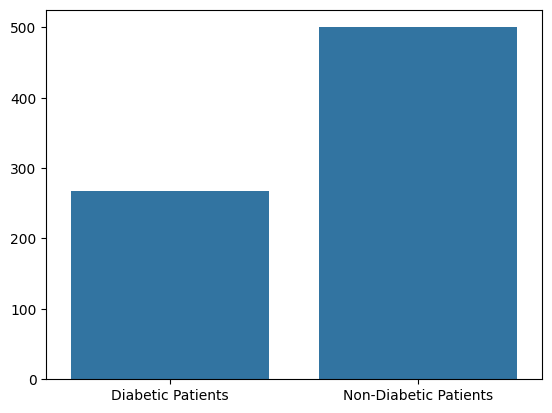

In [15]:
diabetic = db[db["Outcome"]==1]
non_diabetic = db[~(db["Outcome"]==1)]

print("Diabetic Patient Count:\t\t\t"+ str(len(diabetic)))
print("Non-Diabetic Patient Count:\t\t"+ str(len(non_diabetic)))
sns.barplot(x=['Diabetic Patients','Non-Diabetic Patients'], y= [len(diabetic),len(non_diabetic)], )
print("Diabetic Patient Percentage:\t\t" + str(round(len(diabetic)/len(db)*100,2)) + " %")
print("Non-Diabetic Patient Percentage:\t" + str(round(len(non_diabetic)/len(db)*100,2)) + " %")

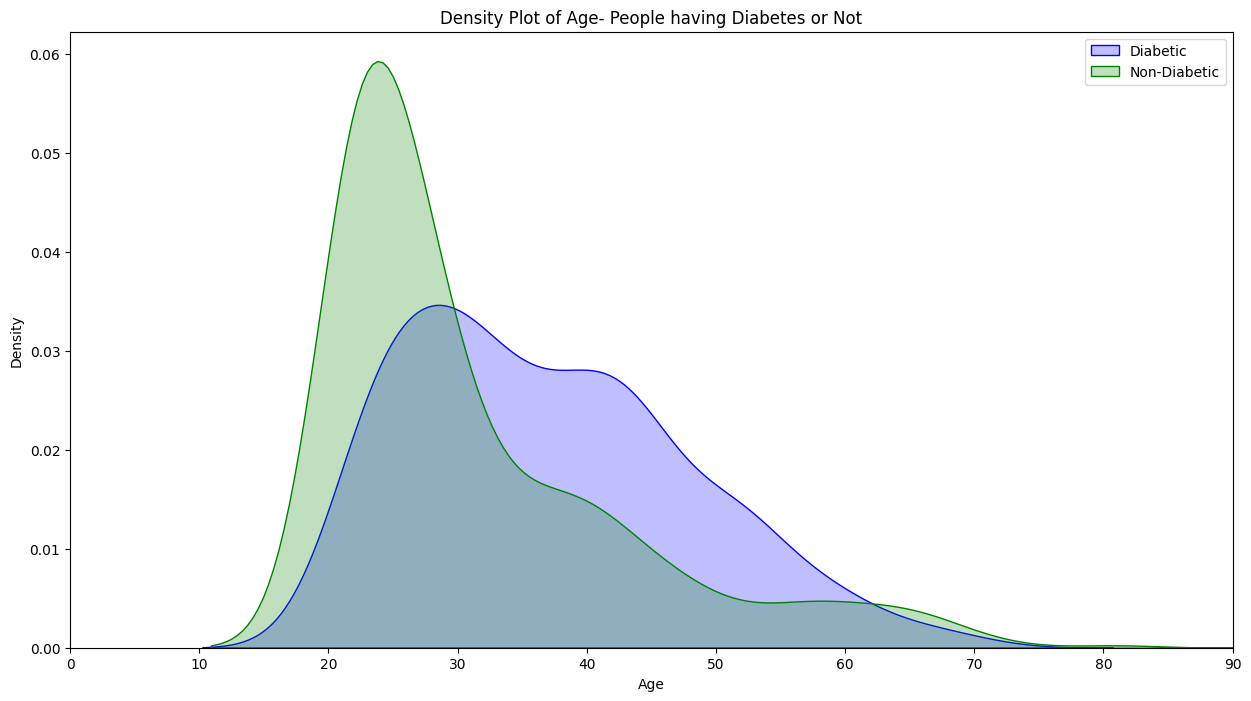

The plot shows that most of the diabetic patients are concentrated in the age-group 20-40


In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(db["Age"][db.Outcome == 1], color="blue", shade=True )
sns.kdeplot(db["Age"][db.Outcome == 0], color="green", shade=True )
plt.legend(['Diabetic', 'Non-Diabetic'])
plt.title('Density Plot of Age- People having Diabetes or Not')
ax.set(xlabel='Age')
plt.xlim(0,90)
plt.show()
print('The plot shows that most of the diabetic patients are concentrated in the age-group 20-40')

Dealing with NA Values

In [17]:
db.describe()
#As some values are zero, it is not good for prediction.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#Creating a Copy of the DataSet for further Operations
dbc=db.copy(deep=True)

In [19]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
dbc[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = dbc[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [21]:
#Checking NA values
dbc.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [22]:
#Checking NA values column-wise
dbc.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [23]:
#Filling NA values in the DataSet
db['Glucose'] = db['Glucose'].replace(0,db['Glucose'].mean())
db['BloodPressure'] = db['BloodPressure'].replace(0,db['BloodPressure'].mean())
db['SkinThickness'] = db['SkinThickness'].replace(0,db['SkinThickness'].mean())
db['Insulin'] = db['Insulin'].replace(0,db['Insulin'].mean())
db['BMI'] = db['BMI'].replace(0,db['BMI'].mean())

In [24]:
#Checking DataSet Again
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Training the Model

In [25]:
x = db.drop('Outcome',axis=1)
y= db['Outcome']
print("Shape of X:\t",x.shape)
print("Shape of Y:\t",y.shape)

Shape of X:	 (768, 8)
Shape of Y:	 (768,)


In [26]:
#Test Data is 20% of the Original Data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
#Shape of the Training Data
print('X training data shape:\t',X_train.shape)
print('Y training data shape:\t',Y_train.shape)

X training data shape:	 (614, 8)
Y training data shape:	 (614,)


In [28]:
#Shape of the Test Data
print('X test data shape:\t',X_test.shape)
print('Y test data shape:\t',Y_test.shape)

X test data shape:	 (154, 8)
Y test data shape:	 (154,)


In [29]:
#Using Pipeline to check which Classifier has the highest accuracy

pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])

In [30]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

Training The Model on Pipeline

In [32]:
for pipe in pipelines:
    pipe.fit(X_train,Y_train)

In [33]:
pipe_dict = {0:'Logistic Regression',
             1:'KNeighbors Classifier',
             2:'SVC',
             3:'Decision Tree Classifier',
             4: 'Random Forest Classifier',
             5: 'Gradient Boosting Classifier'}

In [35]:
for i,model in enumerate(pipelines):
    print("The Test Accuracy of {}:-\t{}".format(pipe_dict[i],model.score(X_test,Y_test)*100),"%")

# As Random Forest Classifier has the highest accuracy, we are going to use it for modelling.

The Test Accuracy of Logistic Regression:-	76.62337662337663 %
The Test Accuracy of KNeighbors Classifier:-	76.62337662337663 %
The Test Accuracy of SVC:-	73.37662337662337 %
The Test Accuracy of Decision Tree Classifier:-	72.72727272727273 %
The Test Accuracy of Random Forest Classifier:-	78.57142857142857 %
The Test Accuracy of Gradient Boosting Classifier:-	76.62337662337663 %


Training The Model on Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
X = db.drop('Outcome',axis=1)
Y = db['Outcome']
rf =RandomForestClassifier(max_depth=3)

In [37]:
rf.fit(X,Y);

Prediction using some Random Data

In [38]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,
},index=[0])

In [39]:
p = rf.predict(new_data)

In [40]:
if p[0] == 0:
    print('Non-Diabetic Patient')
else:
    print('Diabetic Patient')


Diabetic Patient
